In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Credit & Collection Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,interest_in_discount_program,training_ID,trainer_name,training_total_meetings,training_price,discount_training,training_type,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,2,...,2,B0001,Alam,8,3000000,0,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Managing Corporate Collection,Manajemen Resiko APU & PPT bagi Staff Perbanka...
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,3,...,2,B0002,Reza,11,4000000,10,Credit & Collection Series,How to detect & prevent application fraud in D...,How to detect & prevent application fraud in D...,Managing Corporate Collection
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,4,...,4,B0003,Haris,14,11000000,25,Credit & Collection Series,Managing Corporate Collection,Manajemen Resiko APU & PPT bagi Staff Perbanka...,Graphology & Powerful Interview for Credit Ana...
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,2,...,3,B0004,Reza,11,11000000,10,Credit & Collection Series,How to detect & prevent application fraud in D...,How to detect & prevent application fraud in D...,Managing Corporate Collection
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,5,B0005,Haris,17,11000000,50,Credit & Collection Series,Graphology & Powerful Interview for Credit Ana...,How to detect & prevent application fraud in D...,How to detect & prevent application fraud in D...


In [3]:
df.drop([
    "Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email",
    "transaction_date", "training_ID", "discount_training", "training_price", "total_payment", "brand_sustainability", 
    "training_type", "upselling"
], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   company_field                                5000 non-null   object
 1   level_training_process                       5000 non-null   int64 
 2   purchasing_time_patterns                     5000 non-null   object
 3   number_of_participants                       5000 non-null   int64 
 4   group                                        5000 non-null   object
 5   satisfaction                                 5000 non-null   int64 
 6   communication_channel                        5000 non-null   object
 7   complaints                                   5000 non-null   object
 8   communication_quality                        5000 non-null   object
 9   possibility_of_purchasing_the_same_training  5000 non-null   int64 
 10  frequency_en

In [4]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object" :
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = MinMaxScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,level_training_process,number_of_participants,satisfaction,possibility_of_purchasing_the_same_training,frequency_engagement,rating_training,interest_in_discount_program,training_total_meetings,company_field,purchasing_time_patterns,group,communication_channel,complaints,communication_quality,tren_mode_factor,trainer_name,training_name,cross_selling
0,0.25,0.05,0.00,0.21,0.08,0.00,0.25,0.18,4,0,1,0,0,1,0,0,5,3
1,0.50,0.21,0.50,0.43,0.21,0.50,0.25,0.45,1,0,1,1,1,2,0,6,2,2
2,0.75,0.42,0.75,0.57,0.50,0.75,0.75,0.73,14,1,0,2,2,0,1,2,3,4
3,0.25,0.21,0.50,0.43,0.33,0.25,0.50,0.45,12,2,1,2,1,2,0,6,2,2
4,1.00,0.79,1.00,1.00,0.67,1.00,1.00,1.00,10,1,0,2,2,0,1,2,1,2


In [5]:
X = df2.drop("cross_selling", axis=1)
y = df2["cross_selling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
reg = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:16<00:00,  2.46it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 17
[LightGBM] [Info] Start training from score -2.292635
[LightGBM] [Info] Start training from score -4.286716
[LightGBM] [Info] Start training from score -1.183354
[LightGBM] [Info] Start training from score -2.030651
[LightGBM] [Info] Start training from score -1.660731
[LightGBM] [Info] Start training from score -4.150915
[LightGBM] [Info] Start training from score -1.487220
[LightGBM] [Info] Start training from score -4.135167


100%|██████████| 29/29 [00:18<00:00,  1.61it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.88,0.57,None,0.86,1.34
XGBClassifier,0.88,0.57,None,0.86,0.81
ExtraTreesClassifier,0.87,0.57,None,0.85,0.63
RandomForestClassifier,0.87,0.56,None,0.84,0.71
BaggingClassifier,0.85,0.55,None,0.83,0.16
AdaBoostClassifier,0.84,0.55,None,0.82,0.34
SVC,0.79,0.50,None,0.77,0.97
KNeighborsClassifier,0.79,0.50,None,0.76,0.27
LinearDiscriminantAnalysis,0.78,0.50,None,0.76,0.04


In [6]:
def evaluate_performa(X_test, y_test, model1, model2, model3, model4, model5):
    rate = [0, 0, 0, 0, 0]
    #difference = [0, 0, 0, 0, 0]

    X_test = X_test.reset_index(drop=True)
    for i, _ in X_test.iterrows():
        X = np.array(X_test.iloc[[i]])
        y = np.array(y_test.iloc[[i]])
        difference = [0, 0, 0, 0, 0]
        difference[0] = abs(model1.predict(X) - y[0])
        difference[1] = abs(model2.predict(X) - y[0])
        difference[2] = abs(model3.predict(X) - y[0])
        difference[3] = abs(model4.predict(X) - y[0])
        difference[4] = abs(model5.predict(X) - y[0])
        print(difference)

        a = int(np.argmin(difference))
        print(a)
        for i in range(len(difference)):
            if difference[a] == difference[i]:
                rate[i] += 1
    
    a = f"Best model : {rate.index(max(rate))+1}"
    return a, rate

In [8]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier 

forest = RandomForestClassifier()
bagging = BaggingClassifier()
extra = ExtraTreesClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier()

forest.fit(X_train, y_train)
bagging.fit(X_train, y_train)
extra.fit(X_train, y_train)
lgb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

a = evaluate_performa(X_test, y_test, forest, bagging, extra, lgb, xgb)
a

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 17
[LightGBM] [Info] Start training from score -2.292635
[LightGBM] [Info] Start training from score -4.286716
[LightGBM] [Info] Start training from score -1.183354
[LightGBM] [Info] Start training from score -2.030651
[LightGBM] [Info] Start training from score -1.660731
[LightGBM] [Info] Start training from score -4.150915
[LightGBM] [Info] Start training from score -1.487220
[LightGBM] [Info] Start training from score -4.135167
[array([4]), array([4]), array([4]), array([4]), array([4], dtype=int64)]
0
[array([0]), array([0]), array([0]), array([0]), array([0], dtype=int64)]
0
[array([0]), array([0]), array([0]), array([0]), array([0], dtype

('Best model : 4', [973, 944, 969, 983, 981])

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate2(X_test, y_test, model1, model2, model3, model4, model5):
    result = {
        "Models Name": [],
        "Accuracy": [],
        "Precision Score": [],
        "Recall Score": [],
        "F1 Score": []
    }
    models = [model1, model2, model3, model4, model5]
    for i in range(5):
        y_pred = models[i].predict(X_test)
        result["Models Name"].append(models[i].__class__.__name__)
        result["Accuracy"].append(accuracy_score(y_test, y_pred))
        result["Precision Score"].append(precision_score(y_test, y_pred, average="micro"))
        result["Recall Score"].append(recall_score(y_test, y_pred, average="micro"))
        result["F1 Score"].append(f1_score(y_test, y_pred, average="micro"))
    
    result = pd.DataFrame(result)
    return result

result = evaluate2(X_test, y_test, forest, bagging, extra, lgb, xgb)
result

,Models Name,Accuracy,Precision Score,Recall Score,F1 Score
0,RandomForestClassifier,0.87,0.87,0.87,0.87
1,BaggingClassifier,0.84,0.84,0.84,0.84
2,ExtraTreesClassifier,0.86,0.86,0.86,0.86
3,LGBMClassifier,0.88,0.88,0.88,0.88
4,XGBClassifier,0.88,0.88,0.88,0.88


<Axes: ylabel='Models Name'>

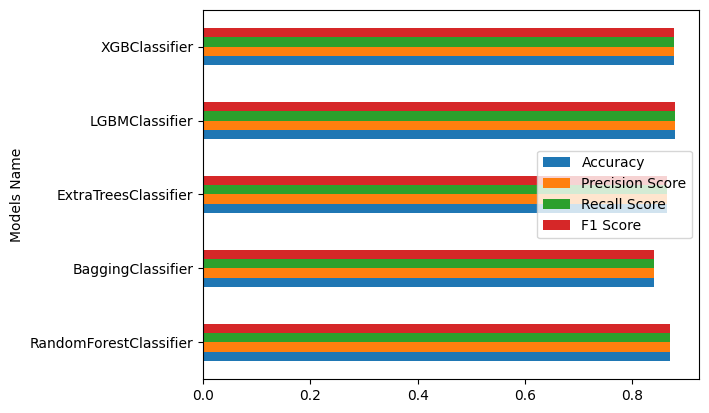

In [10]:
result.plot.barh(x="Models Name")